In [50]:
import pickle
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
with open('data_pad/data_pad.pkl', 'rb') as handle:
    dataset = pickle.load(handle)

In [84]:
visits = []
ages = []
codes = []

type_ICU = 9

for patient in dataset:
    nb_visits = 0
    patient_codes = set()
    for visit in patient:
        if visit["mask_v"].item() == 1:
            nb_visits += 1
            if visit['type'] == type_ICU:
                ages.append(visit['age'].item())
            for c in visit['x']:
                if c.item() > 5:
                    patient_codes.add(c.item())
    codes.append(len(patient_codes))
    visits.append(nb_visits)



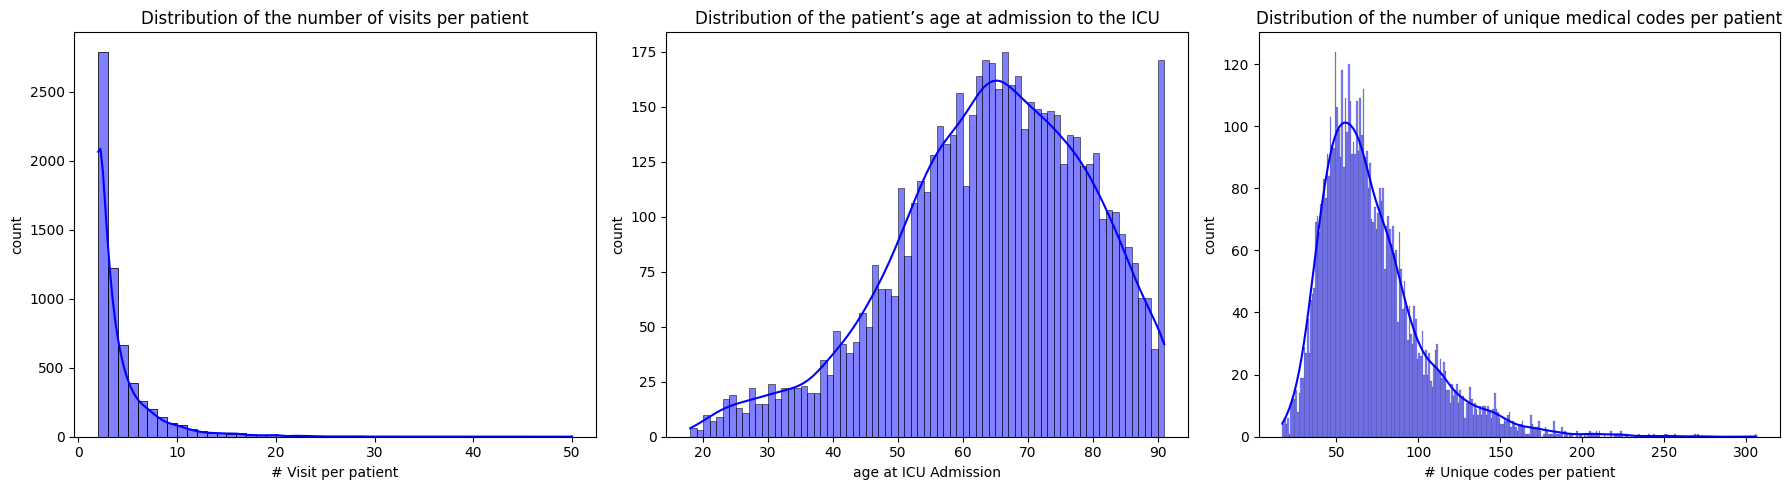

In [79]:
# Créer une figure avec une grille de sous-graphiques 1x3
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Premier histogramme
sns.histplot(visits, bins=range(min(visits), max(visits) + 1), stat='count', kde=True, color='blue', edgecolor='black', ax=axes[0])
axes[0].set_title('Distribution of the number of visits per patient')
axes[0].set_xlabel('# Visit per patient')
axes[0].set_ylabel('count')

# Deuxième histogramme
sns.histplot(ages, bins=range(min(ages), max(ages) + 1), stat='count', kde=True, color='blue', edgecolor='black', ax=axes[1])
axes[1].set_title('Distribution of the patient’s age at admission to the ICU')
axes[1].set_xlabel('age at ICU Admission')
axes[1].set_ylabel('count')

# Troisième histogramme
sns.histplot(codes, bins=range(min(codes), max(codes) + 1), stat='count', kde=True, color='blue', edgecolor='black', ax=axes[2])
axes[2].set_title('Distribution of the number of unique medical codes per patient')
axes[2].set_xlabel('# Unique codes per patient')
axes[2].set_ylabel('count')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()